# Deflection

## Determination of Deflection Response

With the moment-area method, the curvature diagram of a half-model according to the internal moment in Figure 1.2(c-e) is divided into several areas. By taking the moment of the areas around the left support, the mid-span deflection is obtained. A set of equations for calculating the mid-span deflection δ of the three-point bending at the first cracking (δcr), at ultimate (δu) when material has μ>μcrit, and at ultimate when material has μ<μcrit are presented in Eqs.12 (a-c). Mcr and Mu are the bending moments corresponding to the first cracking (φcr, δcr) and ultimate state (φu, δu), respectively.

## Import modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
from sympy import *


In [2]:
from scipy.optimize import newton, brentq, root

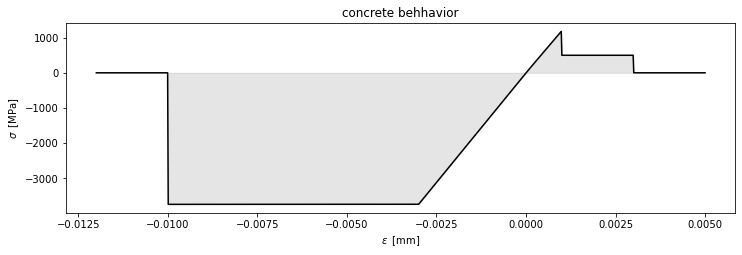

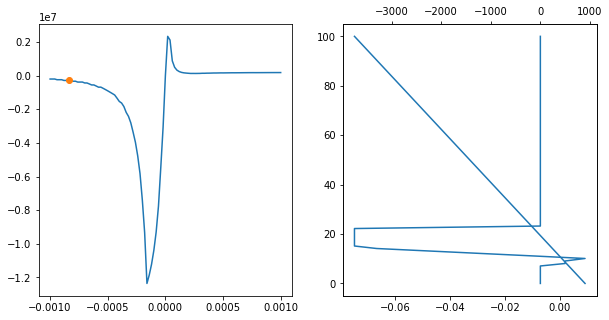

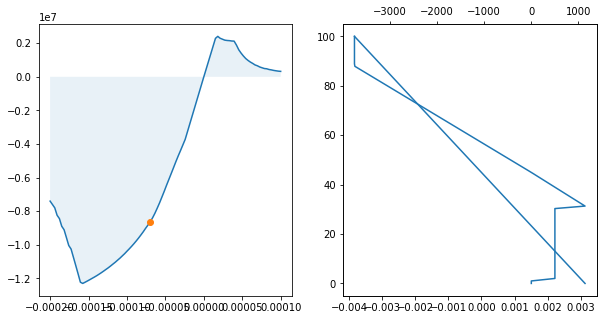

In [3]:
%run moment_curvature.ipynb

In [4]:
model_data

In [5]:
# L = 100
# L_p = 120
# phi_u = 0.008
# phi_cr = 0.004
# M_u = 25.0
# M_cr = 20.0
# mu = 0.1
# mu_crit = 0.03
# delta_cr = 0.5

In [6]:
L ,L_p,phi,phi_u,phi_cr,M_u,M_cr,mu,mu_crit,delta_cr = sp.symbols(
    r'L ,L_p,phi,phi_u,phi_cr,M_u,M_cr,mu,mu_crit,delta_cr', 
    real=True, nonnegative=True
)

In [7]:
# load = M_arr*4/L


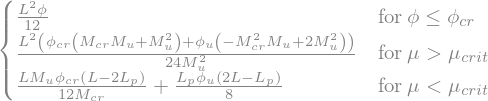

In [8]:
delta = sp.Piecewise(
    (Rational(1,12)*(L**2)*phi, phi <= phi_cr),
    ((L**2/(24*M_u**2))*((2*M_u**2-M_u*M_cr**2)*phi_u + (M_u**2 + M_u*M_cr)*phi_cr) ,  mu > mu_crit),
    ((phi_u*L_p/8 * (2*L-L_p)) + (M_u*phi_cr*L / (12*M_cr)*(L - 2*L_p)) , mu < mu_crit)
)

delta

In [9]:
model_data = {
    phi : kappa_arr,
    phi_cr : 0.0035,
    phi_u : 0.0035,
    L : 100,
    L_p : 200,
    M_cr : 25000, 
    M_u : 0.001, 
}

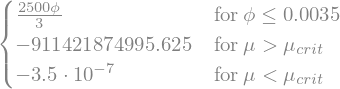

In [10]:
delta.subs(model_data)